# Exploring Ebay Car Sales Data | Pandas. Cleaning Data. 
---

Hey, everyone! 
In this project, I used basic Pandas and Matplotlib functions to explore a dataset of used cars from a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle and then slightly modified by DataQuest.

It was sampled by 50,000 data points from the full dataset, to ensure code runs quickly.
Also, it was dirtied a bit to make it more closely resemble what it is expected from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with). 

Mostly I was cleaning and preparing the data for the analysis in this project. 

To do that I used:
- `df.shape`, `df.describe`, `df.isnull`, `df.Series.value_counts()`, `sns.heatmap` to explore data and find some anolmalies, insuffinfient data, outliers by collumns
- `str.strip`, `str.replce`, `Series.astype()`, `df.dropna()` to prepare, clean data and covert datatypes
- `df.Series.plot.hist()`, `.df.Series.plot.hist()`, `df.Series.plot.pie()` to visualize data and make it esier to analize.

My project is split into three sections:
- data exploration;
- data cleaning and preparation; 
- data analysis.

# Exploring data
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')
%matplotlib inline

In [2]:
autos = pd.read_csv("autos.csv", encoding='Latin-1')
autos.index.name = None

In [3]:
def shape_df(df):
    ''' this function shows number of rows and columns in pandas dataframe'''
    print('''number of rows: {} \nnumber of columns: {}'''.format(df.shape[0], df.shape[1]))

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

#### The data dictionary provided with data is as follows:

- __`dateCrawled`__ - When this ad was first crawled. All field-values are taken from this date.
- __`name`__ - Name of the car.
- __`seller`__ - Whether the seller is private or a dealer.
- __`offerType`__ - The type of listing
- __`price`__ - The price on the ad to sell the car.
- __`abtest`__ - Whether the listing is included in an A/B test.
- __`vehicleType`__ - The vehicle Type.
- __`yearOfRegistration`__ - The year in which the car was first registered.
- __`gearbox`__ - The transmission type.
- __`powerPS`__ - The power of the car in PS _(Pferdestrke or 'horse strength')_.
- __`model`__ - The car model name.
- __`kilometer`__ - How many kilometers the car has driven.
- __`monthOfRegistration`__ - The month in which the car was first registered.
- __`fuelType`__ - What type of fuel the car uses.
- __`brand`__ - The brand of the car.
- __`notRepairedDamage`__ - If the car has a damage which is not yet repaired.
- __`dateCreated`__ - The date on which the eBay listing was created.
- __`nrOfPictures`__ - The number of pictures in the ad.
- __`postalCode`__ - The postal code for the location of the vehicle.
- __`lastSeenOnline`__ - When the crawler saw this ad last online.

---
#### Renaming columns
I've deceided adapat name of the columns into "common Python style of naming columns| for comfartable working with dataset for other people. <br>
I used function for cleaning and converting data into s_type of writing and in some places replace names.

In [5]:
def clean_col(col):
    col = col.strip()
    col = col.replace("yearOfRegistration","registration_year")
    col = col.replace("monthOfRegistration","registration_month")
    col = col.replace("powerPS","power_ps")
    col = col.replace("notRepairedDamage","unrepaired_damage")
    col = col.replace("dateCreated","ad_created")
    col = col.replace("dateCrawled","date_crawled")
    col = col.replace("offerType","offer_type")
    col = col.replace("fuelType","fuel_type")
    col = col.replace("postalCode","postal_code")
    col = col.replace("lastSee","last_see")
    col = col.replace("nrOfPictures","num_of_pictures")
    col = col.lower()
    return col

new_columns = []

for c in autos.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)

autos.columns = new_columns
print(autos.columns)

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicletype', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


In [6]:
autos.head(5)

,date_crawled,name,seller,offer_type,price,abtest,vehicletype,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [7]:
shape_df(autos)

number of rows: 50000 
number of columns: 20


## Checking dataframe columns for Null and suspicious values
---

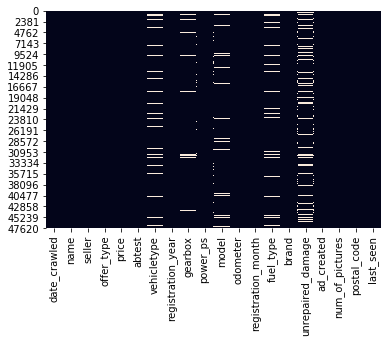

In [8]:
# Creating map with Null values. White color - Null
sns.heatmap(autos.isnull(), cbar = False);

In [9]:
autos.isnull().sum().sort_values(ascending = False).head(7)

unrepaired_damage    9829
vehicletype          5095
fuel_type            4482
model                2758
gearbox              2680
last_seen               0
registration_year       0
dtype: int64

In [10]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicletype,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-12 16:06:22,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


---
### `name`, `brand` & `model` columns:

In [11]:
autos['name'].value_counts().head()
# no null values 

Ford_Fiesta            78
Volkswagen_Golf_1.4    75
BMW_316i               75
Volkswagen_Polo        72
BMW_318i               72
Name: name, dtype: int64

In [12]:
autos['brand'].value_counts().head()
#  no null values 

volkswagen       10687
opel              5461
bmw               5429
mercedes_benz     4734
audi              4283
Name: brand, dtype: int64

In [13]:
autos['model'].value_counts().head()
# has 2758 null values 

golf      4024
andere    3528
3er       2761
polo      1757
corsa     1735
Name: model, dtype: int64

I've decided to keep all this columns in case if product team wants to analyze ads by car models because column `model` has in sum around 5000 null and `andere` (other from german) values altogheter what's aproximetely 10% of all values from dataset. We can recover information about the car models from the `name`
column by using regex and `str.extract()`.


## Other columns with strings
----

In [14]:
autos['seller'].value_counts().head()
# no null values 

privat        49999
gewerblich        1
Name: seller, dtype: int64

After excluding `gewerblich` can drop this column

In [15]:
autos['offer_type'].value_counts().head()
# no null values 

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

After excluding `Gesuch` can drop this column

In [16]:
autos['abtest'].value_counts().head()
# no null values 

test       25756
control    24244
Name: abtest, dtype: int64

In [17]:
autos['vehicletype'].value_counts().head()
# has 5095 null values 

limousine     12859
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
Name: vehicletype, dtype: int64

In [18]:
autos['gearbox'].value_counts().head()
# has 2680 null values 

manuell      36993
automatik    10327
Name: gearbox, dtype: int64

In [19]:
autos['fuel_type'].value_counts().head()
# has 4482 null values 

benzin    30107
diesel    14567
lpg         691
cng          75
hybrid       37
Name: fuel_type, dtype: int64

In [20]:
autos['unrepaired_damage'].value_counts().head()
# has 9829 null values 

nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64

# Data cleaning
---

## Clomuns that need to be reviewed carefuly:

__numeric data:__
- column_5 `price` – `$` before the number
- column_10 `power_ps` - Enormous range between `min` : `0`, 'mean' : `116.34` and `max` : `17700.000000` values
- column_12 `odometer` - `km` str after numeric values
- column_18 `num_of_pictures` - all values with `0`, we can drop this column | numeric data

__strings:__
- column_3 `seller` - only one value `gewerblich` is different from others
- column_4 `offer_type` -  only one value `Gesuch` is different from others
- column_7 `vehicletype` – 5095 Null values
- column_9 `gearbox` - 2680 Null values
- column_11 `model` - 2758 Null values
- column_14 `fuel_type` - 4482 Null values
- column_16 `unrepaired_damage` - 9829 Null values

__date & time:__

- column_8 `registration_year ` – `max` year is 9999

## Dropping columns with same or unnecessary values
---

Without a doubt we can drop columns:
- `seller` – all the values except one are the same;
- `offer_type` – all the values except one are the same;
- `abtest` – information that is not related to the cars;
- `num_of_pictures` – all values the same and contain `0`.


In [21]:
autos = autos[autos['seller'] != 'gewerblich']

In [22]:
autos = autos[autos['offer_type'] != 'Gesuch']

In [23]:
autos = autos.drop(columns=['seller', 'offer_type', 'abtest', 'num_of_pictures'])

In [24]:
autos.head()

,date_crawled,name,price,vehicletype,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


# Numeric values
---
## column_5 `price`
This column contains non-numeric characters, so it's impossible now to make any computations with values from it. <br> 
So I'm going to remove any whitespaces, __`$`__ sign and convert it into __`float`__.

In [25]:
autos["price"].value_counts().head(3)

$0        1420
$500       781
$1,500     734
Name: price, dtype: int64

In [26]:
autos["price"] = autos["price"].str.strip()
autos["price"] = autos["price"].str.replace('$', '')
autos["price"] = autos["price"].str.replace(',', '')
autos["price"] = autos["price"].astype('float')

In [27]:
autos.price.head(2)

0    5000.0
1    8500.0
Name: price, dtype: float64

In [28]:
autos.price.describe().apply(lambda x: format(x, 'f')) 
#Describing without scientific notation &  Removing outliers – .apply(lambda x: format(x, 'f')) 

count       49998.000000
mean         9840.435377
std        481113.999084
min             0.000000
25%          1100.000000
50%          2950.000000
75%          7200.000000
max      99999999.000000
Name: price, dtype: object

Now we see that this column has some outliers and `0` values.
Let's check it visually by using histogtam and boxplot.

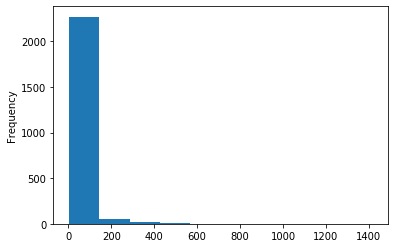

In [29]:
price = autos.price.value_counts()
price.plot.hist();

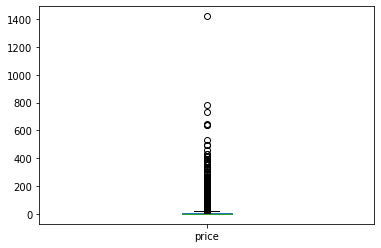

In [30]:
price.plot.box();

### Removing outliers:
I'm going to drop rows woth `0` values and remove outliers with IQR score and create a dataset without them for further data analysis, to avoid biases in making data-driven decisions.

In [31]:
# removing rows with 0 price
autos_drop_0_price = autos[autos.price != 0]

In [32]:
autos_drop_0_price.price.describe(include = 'all').apply(lambda x: format(x, 'f'))
#Describing without scientific notation &  Removing outliers – .apply(lambda x: format(x, 'f')) 

count       48578.000000
mean        10128.084483
std        488092.310936
min             1.000000
25%          1200.000000
50%          3000.000000
75%          7490.000000
max      99999999.000000
Name: price, dtype: object

In [33]:
# creating working dataset without outliers

Q1_price = 1200
Q3_price = 7490

IQR_price = Q3_price - Q1_price
Out_1_price = Q1_price - 1.5 * IQR_price
Out_2_price = Q3_price + 1.5 * IQR_price

autos_no_out = autos_drop_0_price.loc[(autos_drop_0_price.price.between(Out_1_price,Out_2_price))]

In [34]:
shape_df(autos_drop_0_price)

number of rows: 48578 
number of columns: 16


In [35]:
shape_df(autos_no_out)

number of rows: 45109 
number of columns: 16


In [36]:
autos_no_out.price.describe()

count    45109.000000
mean      4177.344078
std       3968.693123
min          1.000000
25%       1150.000000
50%       2750.000000
75%       6000.000000
max      16900.000000
Name: price, dtype: float64

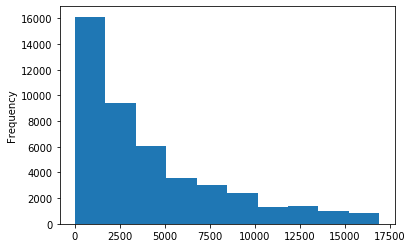

In [37]:
autos_no_out.price.plot.hist();

Further I'm going to work with this dataset __`autos_no_out`__

---
## column_10: ` power_ps` 

In [38]:
autos_no_out.power_ps.describe()

count    45109.000000
mean       109.835022
std        204.577570
min          0.000000
25%         69.000000
50%        103.000000
75%        140.000000
max      17700.000000
Name: power_ps, dtype: float64

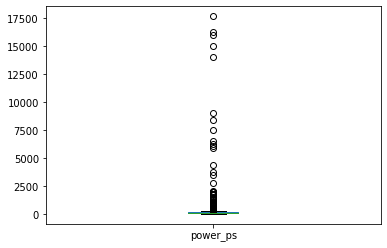

In [39]:
autos_no_out.power_ps.plot.box();

We see enormous range between `min` : `0`, 'mean' : `108.709019` and `max` : `17700.000000` values. <br>
I'm not a car owner, so I don't know what units are used for evaluation this feature and values of this column are avarege and normal. I've made a tiny research in the internet about this information
, and __[here what I found about units](https://www.carkeys.co.uk/guides/different-car-power-outputs-explained)__: <br>
_"PS is short for the German word ‘Pferdestarke’ which translates to horsepower. It is also sometimes referred to as metric horsepower. __One PS works out to about 98.6 per cent of a single brake horsepower.__"_

Here __[infromation about average HP](https://www.autolist.com/guides/average-car-horsepower )__: <br>
_"While the horsepower varies from vehicle to vehicle, and country to country, in a typical American car, you can expect, __on average, a 120-horsepower engine. Larger SUVs often have a 200-horsepower engine, and smaller cars may only have a 70-horsepower engine.__"

So it's obobvious that values can't be more than 1000 or less than 1. <br>
Let's clean dataset:

In [40]:
autos_no_out = autos_no_out.loc[(autos_no_out.power_ps < 1001) & (autos_no_out.power_ps > 0)]

In [41]:
autos_no_out.power_ps.describe()

count    40182.000000
mean       118.419267
std         53.425964
min          1.000000
25%         75.000000
50%        110.000000
75%        144.000000
max       1000.000000
Name: power_ps, dtype: float64

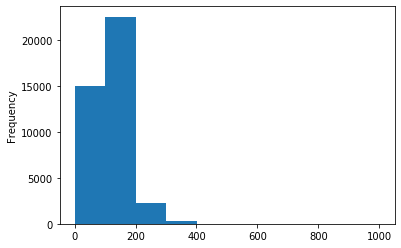

In [42]:
autos_no_out.power_ps.plot.hist();

---
## column_12 `odometer`
1. Removing non-numeric characters

In [43]:
autos_no_out["odometer"] = autos_no_out["odometer"].str.replace('km', '')
autos_no_out["odometer"] = autos_no_out["odometer"].str.replace(',', '')

2. Converting the column to a numeric dtype.

In [44]:
autos_no_out["odometer"] = autos_no_out["odometer"].astype(int)

Use `DataFrame.rename()` to rename the column to `odometer_km`.

In [45]:
autos_no_out.rename({"odometer": "odometer_km"}, axis=1, inplace=True)

Now let's values:

In [46]:
autos_no_out.odometer_km.describe().apply(lambda x: format(x, 'f'))
#Describing without scientific notation &  Removing outliers – .apply(lambda x: format(x, 'f')) 

count     40182.000000
mean     129693.643920
std       35740.652763
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: object

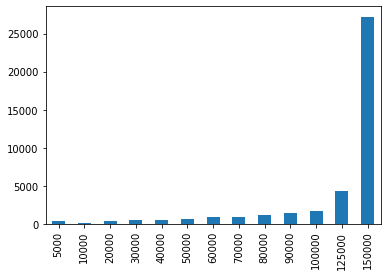

In [47]:
km = autos_no_out.odometer_km.value_counts().sort_index(ascending=True)
km.plot.bar();

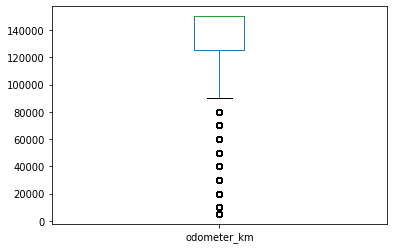

In [48]:
autos_no_out.odometer_km.plot.box();

### Removing outliers

In [49]:
Q1_km = 125000
Q3_km = 150000
IQR_km = Q3_km - Q1_km
Out_1_km = Q1_km - 1.5 * IQR_km
Out_2_km = Q3_km + 1.5 * IQR_km

In [50]:
autos_no_out = autos_no_out.loc[(autos_no_out.odometer_km.between(Out_1_km,Out_2_km))]

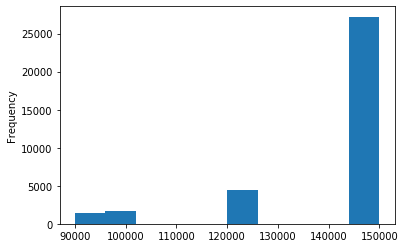

In [51]:
autos_no_out.odometer_km.plot.hist();

### column_8: ` registration_year` 
---


In [52]:
autos_no_out['registration_year'].describe()

count    34710.000000
mean      2002.584788
std          6.331867
min       1954.000000
25%       1999.000000
50%       2003.000000
75%       2006.000000
max       2019.000000
Name: registration_year, dtype: float64

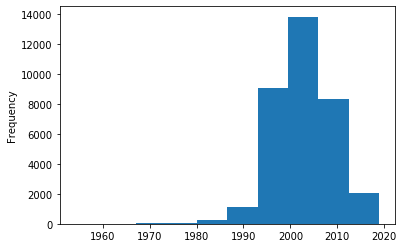

In [53]:
autos_no_out['registration_year'].plot.hist();

After the cleaning the data from outliers in `price` and `odometer_km` columns:
- the minimum value for registration_year became __`1954`__ isntead of __`1000`__, so by previous steps we clean the wrong values automatically. <br>
- the maximum value of this column became from __`9999`__ to `2019`, which may be true beacuse it's 2019 right now, but still we need to check when the ads were created. <br>
- Firstly let's look at top 5 values from head and tail and visualize all the values by using boxplot:

In [54]:
autos_years = autos_no_out.registration_year
autos_years.value_counts().sort_index(ascending = False).head()

2019      1
2018    302
2017    916
2016    758
2015      2
Name: registration_year, dtype: int64

In [55]:
autos_years.value_counts().sort_index(ascending = False).tail()

1961    1
1960    2
1958    1
1956    1
1954    2
Name: registration_year, dtype: int64

Next let's determine what was the year of posting ads. 

In [56]:
autos_no_out.ad_created.max()

'2016-04-07 00:00:00'

We see that It's __`2016`__, let's drop the rows with the wrong values.

In [57]:
autos_no_out = autos_no_out.loc[autos_no_out["registration_year"] < 2017]

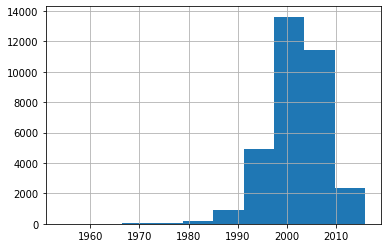

In [58]:
autos_no_out["registration_year"].hist();

In [59]:
autos_no_out["registration_year"].describe()

count    33491.000000
mean      2002.051029
std          5.782083
min       1954.000000
25%       1999.000000
50%       2002.000000
75%       2006.000000
max       2016.000000
Name: registration_year, dtype: float64

#### Insights
---
- Most of the cars that are on the market were produced in the between 1999 and 2006. 
- Avarge age of the car on the market is 15 years. 

### column_12: `registration_month`
---
Most of the values with "0th month". 
Guess that means that the month of registration is uknown.

In [60]:
autos["registration_month"].value_counts()

0     5074
3     5071
6     4368
5     4107
4     4102
7     3949
10    3651
12    3447
9     3389
11    3360
1     3282
8     3190
2     3008
Name: registration_month, dtype: int64

## Working with time values

- `date_crawled` - When this ad was first crawled. All field-values are taken from this date.
- `ad_created` - The date on which the eBay listing was created.
- `last_seen` - When the crawler saw this ad last online

In [61]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [62]:
date_crawled = autos_no_out['date_crawled'].str[:10].sort_index().value_counts(normalize=True, dropna=False)*100
date_crawled.head()

2016-04-03    3.884626
2016-03-20    3.818936
2016-03-12    3.783106
2016-03-14    3.717417
2016-03-21    3.702487
Name: date_crawled, dtype: float64

In [63]:
ad_created = autos_no_out['ad_created'].str[:10].sort_index().value_counts(normalize=True, dropna=False)*100
date_crawled.head()

2016-04-03    3.884626
2016-03-20    3.818936
2016-03-12    3.783106
2016-03-14    3.717417
2016-03-21    3.702487
Name: date_crawled, dtype: float64

In [64]:
last_seen = autos_no_out['last_seen'].str[:10].sort_index().value_counts(normalize=True, dropna=False)*100
last_seen.head()

2016-04-06    21.507271
2016-04-07    12.561584
2016-04-05    12.161476
2016-03-17     2.929145
2016-04-02     2.579798
Name: last_seen, dtype: float64

# Analyzing Brands

In [65]:
(autos_no_out.brand.value_counts(normalize=True, dropna=False)*100).head(10)

volkswagen       22.065630
bmw              11.773312
opel             11.501597
mercedes_benz     9.495088
audi              8.703831
ford              7.007853
renault           4.798304
peugeot           3.129199
fiat              2.391687
seat              1.836314
Name: brand, dtype: float64

In [66]:
brands_15 = (autos_no_out.brand.value_counts(normalize=True, dropna=False)*100).head(15).index.tolist()

brands_dict = {}

for i in brands_15:
    price_sum = autos_no_out.loc[autos_no_out.brand == i, 'price'].sum()
    num = autos_no_out.loc[autos_no_out.brand == i, 'price'].count()
    avg_price_by_brand = price_sum/num
    if i not in brands_dict:
        brands_dict[i] = avg_price_by_brand
        
avg_price = float(autos_no_out.price.sum() / autos_no_out.price.count())

In [67]:
print('{:^30}'.format('average price by brand'))
print('---------------------------')
for i in brands_dict:
    print('{:>17}: {:.2f}'.format(i, brands_dict[i]))
print('---------------------------')
print('overall avg price: {:.2f}'.format(avg_price))

    average price by brand    
---------------------------
       volkswagen: 3929.56
              bmw: 5804.36
             opel: 2377.20
    mercedes_benz: 5317.52
             audi: 5726.54
             ford: 2622.43
          renault: 1961.30
          peugeot: 2528.99
             fiat: 2017.68
             seat: 3146.73
            mazda: 2992.29
            skoda: 5010.51
           nissan: 3361.12
          citroen: 2966.68
           toyota: 4039.90
---------------------------
overall avg price: 3944.91


In [68]:
# creating simple hist

for i in brands_dict:
    if brands_dict[i] < avg_price:
        print('{:>14}'.format(i), '●' * (int((brands_dict[i]/100))))
    else:
        print('{:>14}'.format(i), '✭' * (int((brands_dict[i]/100))))

    volkswagen ●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●
           bmw ✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭
          opel ●●●●●●●●●●●●●●●●●●●●●●●
 mercedes_benz ✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭
          audi ✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭
          ford ●●●●●●●●●●●●●●●●●●●●●●●●●●
       renault ●●●●●●●●●●●●●●●●●●●
       peugeot ●●●●●●●●●●●●●●●●●●●●●●●●●
          fiat ●●●●●●●●●●●●●●●●●●●●
          seat ●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●
         mazda ●●●●●●●●●●●●●●●●●●●●●●●●●●●●●
         skoda ✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭
        nissan ●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●
       citroen ●●●●●●●●●●●●●●●●●●●●●●●●●●●●●
        toyota ✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭✭
